In [1]:
import pandas as pd

In [13]:
train_path = 'train_cluster.csv'
test_path = 'test_cluster.csv'
val_path = 'val_cluster.csv'

In [14]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
val_df = pd.read_csv(val_path)

/home/s2136015/anaconda3/envs/moses/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
import pandas as pd
import re
from collections import Counter

# 假设df是你的DataFrame，'helm_column'是包含HELM表示的列
# df = pd.DataFrame(...) 

def analyze_helm_connections(df, helm_column):
    # 正则表达式匹配特定连接（如1:R1-7:R2）
    connection_pattern = re.compile(r'\d+:\w+-\d+:\w+')

    # 提取所有连接
    connections = []
    for helm in df[helm_column]:
        # 在HELM字符串中查找所有匹配的连接
        connections.extend(connection_pattern.findall(helm))

    # 计算每种连接的频率
    connection_distribution = Counter(connections)

    return connection_distribution

# 使用函数并打印结果
connection_distribution = analyze_helm_connections(val_df, 'HELM')
print(connection_distribution)


Counter({'4:R3-10:R2': 614, '3:R3-10:R2': 105, '1:R1-11:R2': 25, '1:R1-6:R2': 13, '1:R1-5:R2': 12, '1:R1-4:R2': 9, '1:R1-10:R2': 6, '1:R1-3:R2': 2, '1:R1-2:R2': 1, '4:R3-12:R2': 1, '2:R3-7:R2': 1})


In [6]:
# 使用函数并打印结果
connection_distribution = analyze_helm_connections(train_df, 'HELM')
print(connection_distribution)

Counter({'1:R1-6:R2': 1998, '1:R1-7:R2': 1892, '1:R1-11:R2': 346, '1:R1-10:R3': 227, '1:R1-11:R3': 220, '1:R1-9:R3': 153, '1:R1-10:R2': 123, '2:R3-10:R2': 86, '1:R1-12:R3': 72, '1:R1-8:R3': 65, '1:R1-7:R3': 59, '1:R1-9:R2': 58, '1:R1-8:R2': 58, '1:R1-5:R2': 50, '1:R1-3:R2': 43, '1:R1-4:R2': 35, '1:R1-12:R2': 18, '1:R1-13:R3': 5, '1:R1-14:R2': 2, '1:R1-14:R3': 1})


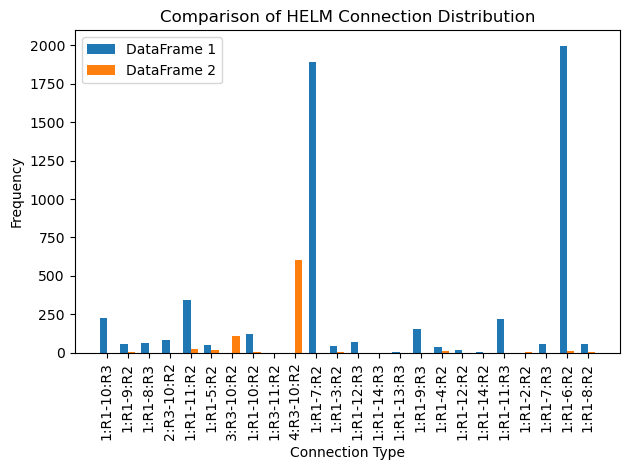

In [15]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# 假设df1和df2是你的两个DataFrame，'helm_column'是包含HELM表示的列
# df1 = pd.DataFrame(...)
# df2 = pd.DataFrame(...)

def analyze_helm_connections(df, helm_column):
    connection_pattern = re.compile(r'\d+:\w+-\d+:\w+')
    connections = []
    for helm in df[helm_column]:
        connections.extend(connection_pattern.findall(helm))
    return Counter(connections)

def plot_comparison_of_connections(df1, df2, helm_column):
    # 分析两个数据集的连接
    connection_distribution1 = analyze_helm_connections(df1, helm_column)
    connection_distribution2 = analyze_helm_connections(df2, helm_column)

    # 获取所有唯一的连接类型
    all_connections = set(connection_distribution1.keys()).union(set(connection_distribution2.keys()))

    # 频率
    frequencies1 = [connection_distribution1[conn] for conn in all_connections]
    frequencies2 = [connection_distribution2[conn] for conn in all_connections]

    # 设置条形图参数
    bar_width = 0.35
    index = np.arange(len(all_connections))

    # 绘制条形图
    plt.bar(index, frequencies1, bar_width, label='DataFrame 1')
    plt.bar(index + bar_width, frequencies2, bar_width, label='DataFrame 2')

    plt.xlabel('Connection Type')
    plt.ylabel('Frequency')
    plt.title('Comparison of HELM Connection Distribution')
    plt.xticks(index + bar_width / 2, all_connections, rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.show()

# 绘制比较图
plot_comparison_of_connections(train_df, test_df, 'HELM')
